In [50]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

In [3]:
cali = pd.read_csv('data/housing.csv')

In [4]:
cali['total_bedrooms'].fillna(value = np.mean(cali['total_bedrooms']), inplace = True)
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
cali.corrwith(cali['median_house_value'])

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049454
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64

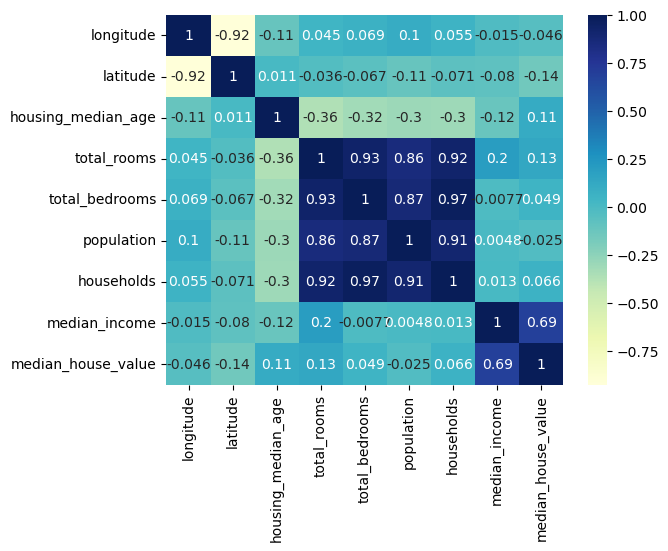

In [7]:
heatmap = sns.heatmap(cali.corr(), cmap="YlGnBu", annot=True)

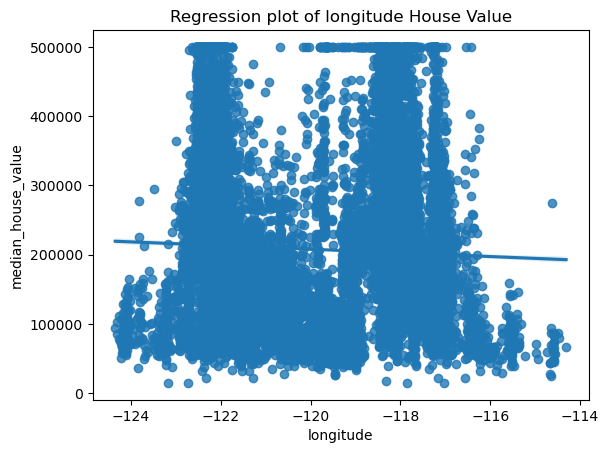

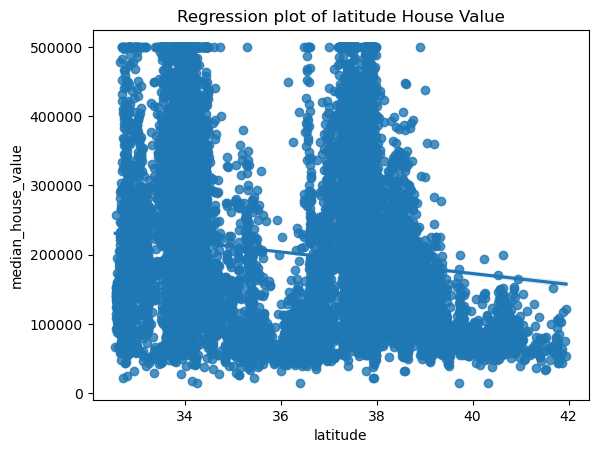

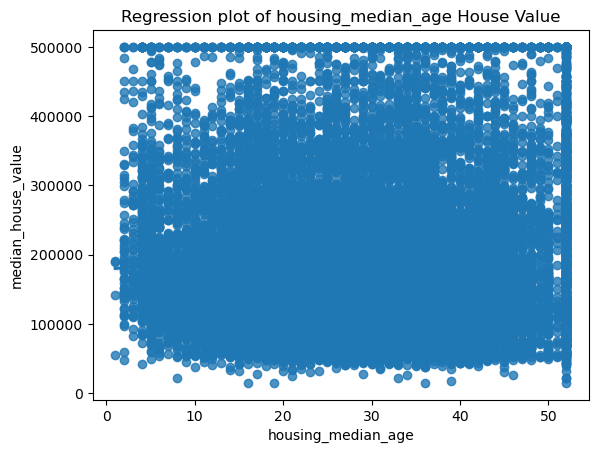

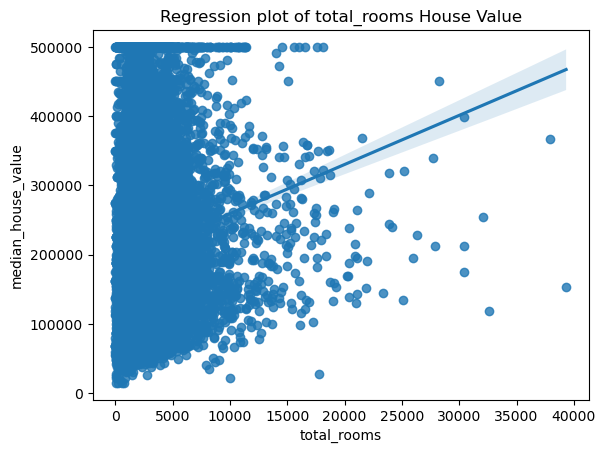

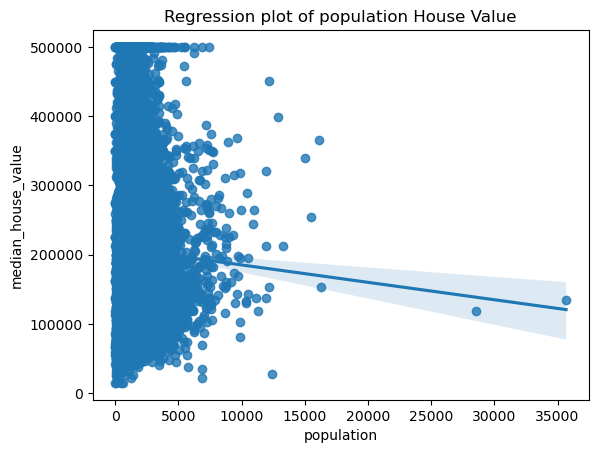

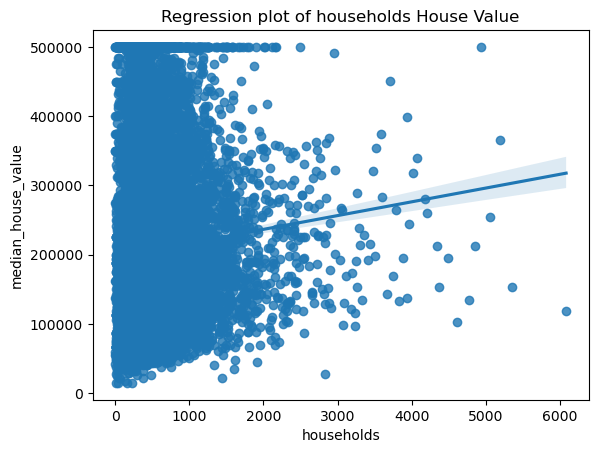

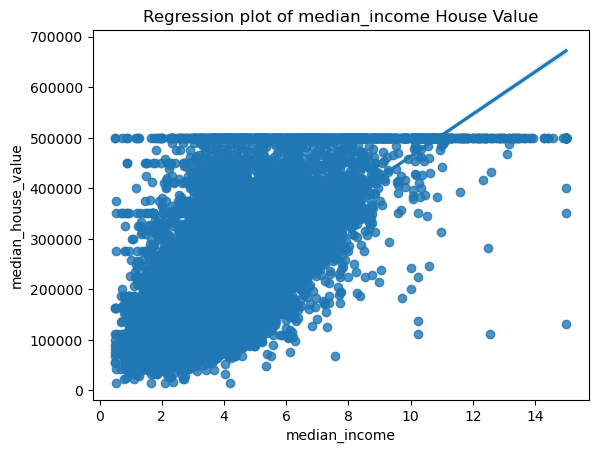

In [97]:
variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households','median_income']

for var in variables:
    plt.figure()
    sns.regplot(x = var, y='median_house_value', data= cali).set(title=f'Regression plot of {var} House Value')

### All columns except Ocean Proximity

In [11]:
#splitting the data
X = cali[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households','median_income']]
y = cali['median_house_value']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
lr = LinearRegression().fit(X_train, y_train)

In [15]:
lr.intercept_

-3484951.8621570375

In [16]:
lr.coef_

array([-4.17783000e+04, -4.19374675e+04,  1.14862311e+03, -1.63616970e+00,
       -4.21678231e+01,  1.47074533e+02,  3.84269729e+04])

In [27]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
results = pd.DataFrame({'Actual': y_test, 'Predicted': lr.predict(X_test)})
print(results)

         Actual      Predicted
20046   47700.0   59777.257601
3024    45800.0  179013.772375
15663  500001.0  318731.423451
20484  218600.0  273270.520074
9814   278000.0  269796.723913
...         ...            ...
17505  237500.0  217707.657452
13512   67300.0   86090.883571
10842  218400.0  269181.156346
16559  119400.0  128318.742426
5786   209800.0  208845.833461

[6192 rows x 2 columns]


In [28]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_train)
print(mse_test)

4934151136.836836
4806514243.032284


In [19]:
lr.score(X_test, y_test)

0.633800581451343

In [20]:
lr.score(X_train, y_train)

0.6316962042277791

In [24]:
r = permutation_importance(lr, X, y,
...                            n_repeats=30, random_state = 42)

In [25]:
for i in r.importances_mean.argsort()[::-1]:
...     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
...         print(f" {cali.columns[i]:<8}"
...               f" {r.importances_mean[i]:.3f}"
...               f" +/- {r.importances_std[i]:.3f}")

 latitude 1.207 +/- 0.013
 longitude 1.053 +/- 0.010
 households 0.797 +/- 0.007
 population 0.471 +/- 0.005
 total_bedrooms 0.346 +/- 0.004
 housing_median_age 0.031 +/- 0.001
 total_rooms 0.002 +/- 0.000


## Including Ocean Proximity, using Pipeline

In [29]:
#splitting the data
X = cali[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households','population', 'median_income', 'ocean_proximity']]
y = cali['median_house_value']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
poly_ohe_d3 = make_column_transformer((PolynomialFeatures(degree = 3), make_column_selector(dtype_include=np.number)),
                                     (OneHotEncoder(drop = 'if_binary', sparse = False), ['ocean_proximity']), remainder = 'passthrough')

In [89]:
transformer = make_column_transformer((OneHotEncoder(), ['ocean_proximity']), remainder = 'passthrough')
transformed = transformer.fit_transform(cali2)
transformed_df = pd.DataFrame(transformed, columns = transformer.get_feature_names())
transformed_df

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [90]:
pipe2 = Pipeline([('transformer', transformer),
                 ('linreg', LinearRegression())])
pipe2.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linreg', LinearRegression())])

In [81]:
pipe = Pipeline([('transformer', poly_ohe_d3),
                ('linreg', LinearRegression())])
pipe.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=3),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa6d85404c0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False),
                                                  ['ocean_proximity'])])),
                ('linreg', LinearRegression())])

In [74]:
train_mse = mean_squared_error(y_train, pipe.predict(X_train))
print(train_mse)

3513010663.724449


In [75]:
test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print(test_mse)

3483439879.3470545


In [77]:
r = permutation_importance(pipe, X, y,
...                            n_repeats=30, random_state = 42)

In [91]:
r2 = permutation_importance(pipe2, X, y,
...                            n_repeats=30, random_state = 42)

In [79]:
for i in r.importances_mean.argsort()[::-1]:
...         print(f"{cali.columns[i]:<8}"
...               f"{r.importances_mean[i]:.3f}"
...               f" +/- {r.importances_std[i]:.3f}")

total_bedrooms33.016 +/- 5.575
total_rooms30.414 +/- 3.443
population4.107 +/- 2.028
latitude2.249 +/- 0.608
longitude1.604 +/- 0.117
households0.856 +/- 0.053
housing_median_age0.256 +/- 0.164
median_income0.036 +/- 0.001


In [92]:
for i in r2.importances_mean.argsort()[::-1]:
...         print(f"{cali.columns[i]:<8}"
...               f"{r2.importances_mean[i]:.3f}"
...               f" +/- {r2.importances_std[i]:.3f}")

households0.760 +/- 0.007
total_bedrooms0.424 +/- 0.005
latitude0.407 +/- 0.006
longitude0.387 +/- 0.005
population0.342 +/- 0.004
median_income0.058 +/- 0.001
housing_median_age0.025 +/- 0.001
total_rooms0.000 +/- 0.000


## Practice with OneHot Encoder

In [46]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(cali[['ocean_proximity']])
print(transformed.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [47]:
print(ohe.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [48]:
cali[ohe.categories_[0]] = transformed.toarray()

In [49]:
cali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


## Using Column Transformer

In [65]:
cali2 = pd.read_csv('data/housing.csv')
cali2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['ocean_proximity']),
    remainder='passthrough')

transformed = transformer.fit_transform(cali2)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

/Users/leostern/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
transformed_df.head()

,onehotencoder__x0_<1H OCEAN,onehotencoder__x0_INLAND,onehotencoder__x0_ISLAND,onehotencoder__x0_NEAR BAY,onehotencoder__x0_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
